# Data Visualization

## Import packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---
## Loading data with Pandas

In [4]:
# Open the data
df = pd.read_csv('FinalContentDataset.csv', index_col=0)

In [5]:
df.head(3)

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
scores = pd.DataFrame(df.groupby('Category')['Score'].sum()).sort_values(by=['Score'], ascending=False)
scores

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


In [8]:
# scores.plot(kind='barh', figsize=(16, 9))

# plt.title('Category popularity on Social Buzz', fontsize=20)
# plt.xlabel('\nPopularity Score', fontsize=16)
# plt.ylabel('')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# # Flips the chart vertically
# plt.gca().invert_yaxis()

# plt.show()

In [9]:
def plot_popularity_scores(scores):
    # Sort the scores and get the top 5 and bottom 5
    sorted_scores = scores.sort_values('Score')
    top_5 = sorted_scores.tail().index
    bottom_5 = sorted_scores.head().index

    # Create a list of colors based on the rank
    colors = ['tab:green' if index in top_5 else 'tab:orange' if index in bottom_5 else 'tab:blue' for index in sorted_scores.index]

    # Plot the popularity scores with colors
    plt.figure(figsize=(16, 9))
    bars = plt.barh(sorted_scores.index, sorted_scores['Score'], color=colors)

    # Add annotation for each bar
    for bar in bars:
        plt.text(bar.get_width() + 2500,
                 bar.get_y() + bar.get_height() / 2,
                 str(bar.get_width()),
                 ha='center',
                 va='center',
                 fontsize=14)

    plt.title('Category Popularity on Social Buzz', fontsize=20)
    plt.xlabel('\nPopularity Score', fontsize=16)
    plt.ylabel('')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(0, 80000)

    plt.show()

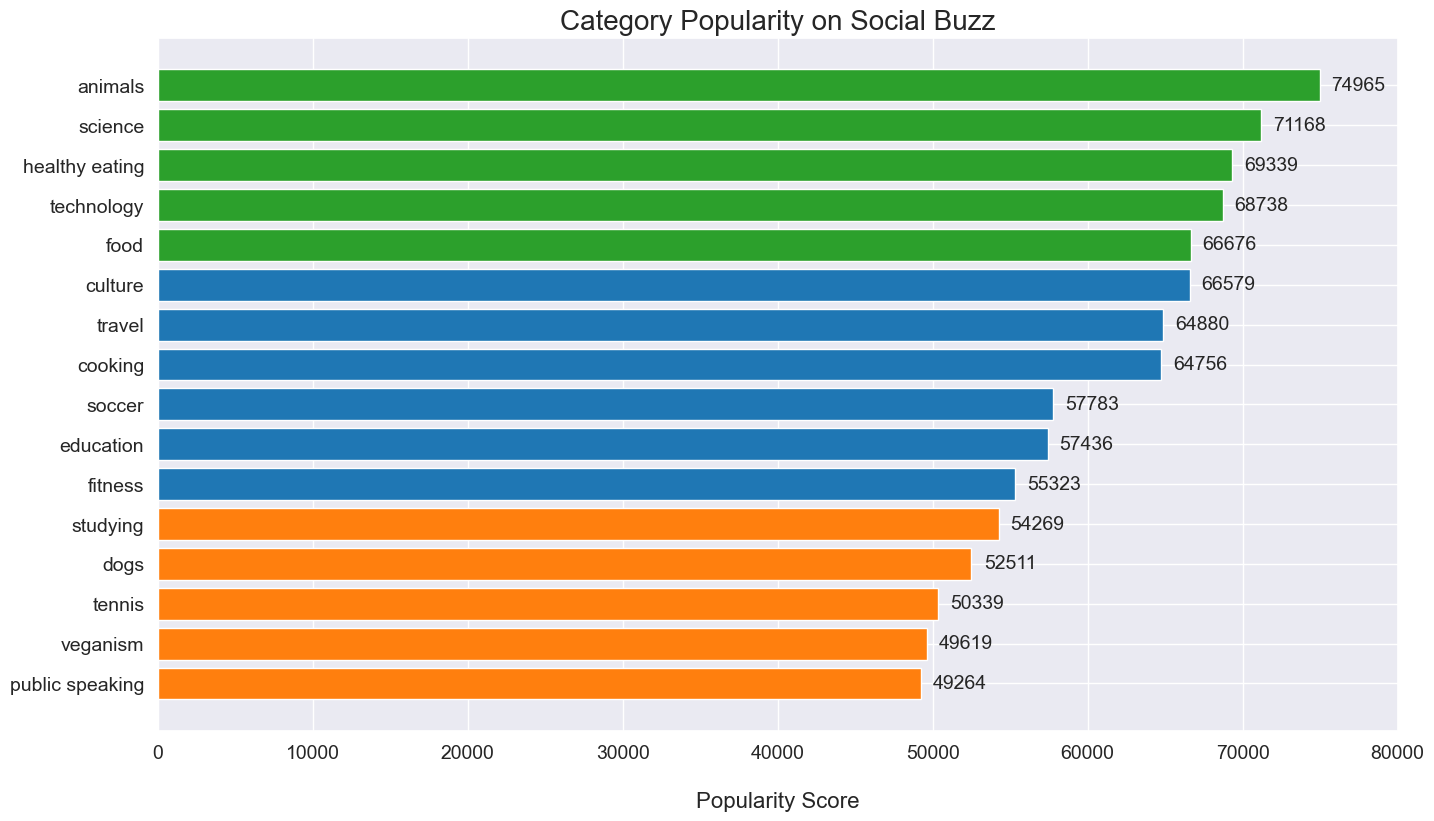

In [10]:
plot_popularity_scores(scores)

**Insights**
- **The Highest Sentiment**: The categories `animals`, `science`, `healthy eating`, `technology`, and `food` have the highest total sentiment. This suggests that these categories may be the most popular or most frequently discussed in the given data.
- **The Lowest Sentiment**: The categories `studying`, `dogs`, `tennis`, `veganism`, and `public speaking` have the lowest total sentiment. This may indicate that these categories are less popular or less frequently discussed compared to other categories.
- **The Importance of Sentiment Analysis**: Sentiment analysis can provide valuable insights into how a category is perceived by the public. For example, categories with high positive sentiment may be viewed more positively by the public, while categories with high negative sentiment may have a negative perception.
- These insights can be used to inform marketing and product strategies. For instance, products or campaigns focusing on categories with high positive sentiment may be more successful than those focusing on categories with negative sentiment.

In [11]:
categories = (df.groupby(['Category', 'Sentiment'])
              .size()
              .reset_index(name='Sentiment Total')
              .sort_values(['Sentiment', 'Sentiment Total'], ascending=False)
              .reset_index(drop=True))
categories

,Category,Sentiment,Sentiment Total
0,animals,positive,1050
1,science,positive,1015
2,healthy eating,positive,985
3,technology,positive,974
4,culture,positive,943
5,food,positive,943
6,cooking,positive,932
7,travel,positive,918
8,soccer,positive,817
9,education,positive,815


In [12]:
categories['Sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [13]:
def plot_sentiment_scores(categories, sentiment):
    # Filter the categories based on the Sentiment
    sentiment_scores = categories[categories['Sentiment'] == sentiment]

    # Get the maximum and minimum sentiment score
    max_score = sentiment_scores['Sentiment Total'].max()
    min_score = sentiment_scores['Sentiment Total'].min()

    # Create a list of colors based on the sentiment score
    colors = ['tab:green' if score == max_score else 'tab:orange' if score == min_score else 'tab:blue' for score in sentiment_scores['Sentiment Total']]

    # Plot the sentiment scores with colors
    plt.figure(figsize=(16, 9))
    plt.bar(sentiment_scores['Category'], sentiment_scores['Sentiment Total'], color=colors)

    plt.title(f'Total {sentiment.capitalize()} Sentiment by Category', fontsize=20)
    plt.xlabel('')
    plt.ylabel('Total Sentiment\n', fontsize=16)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)

    plt.show()

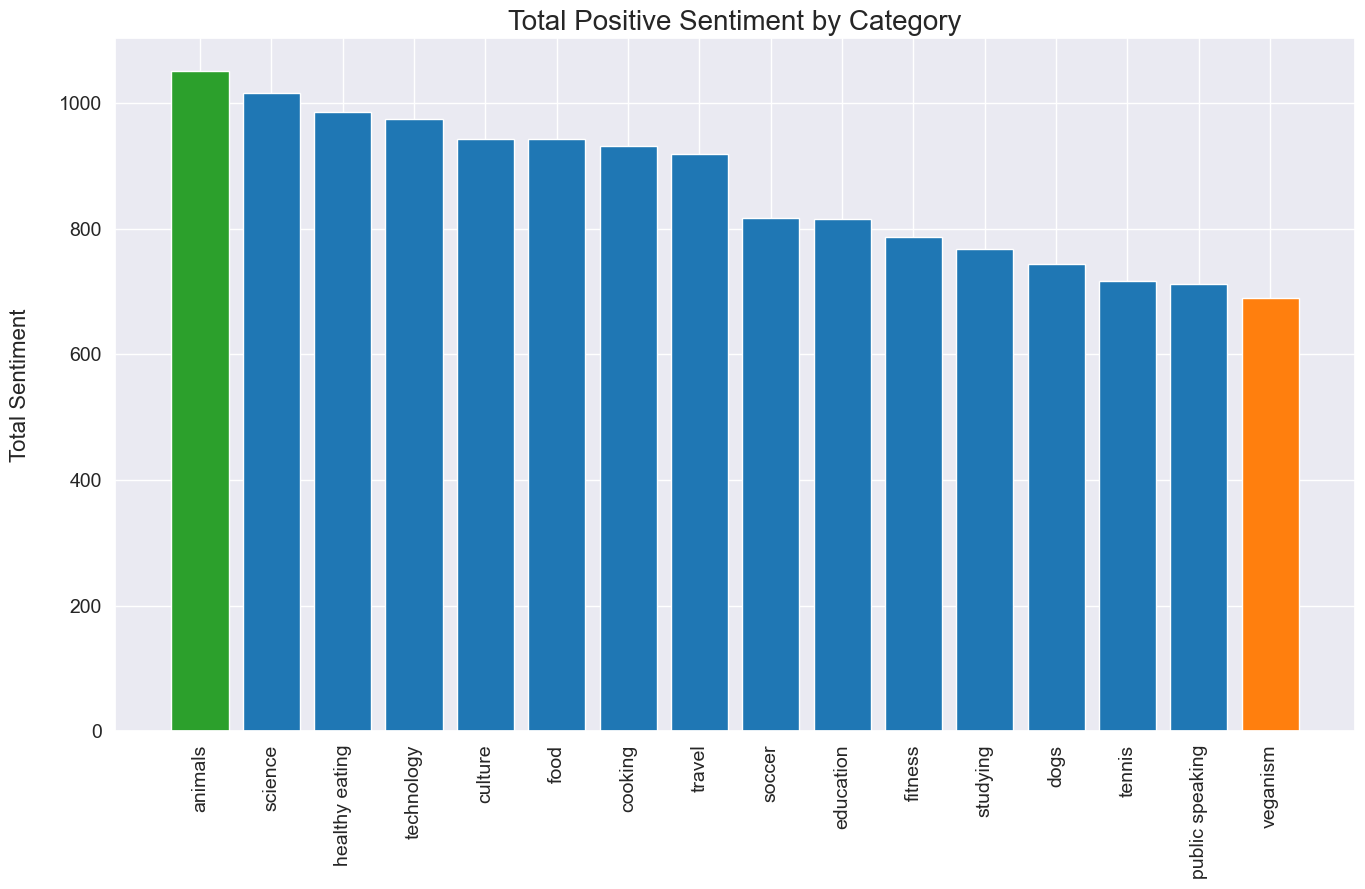

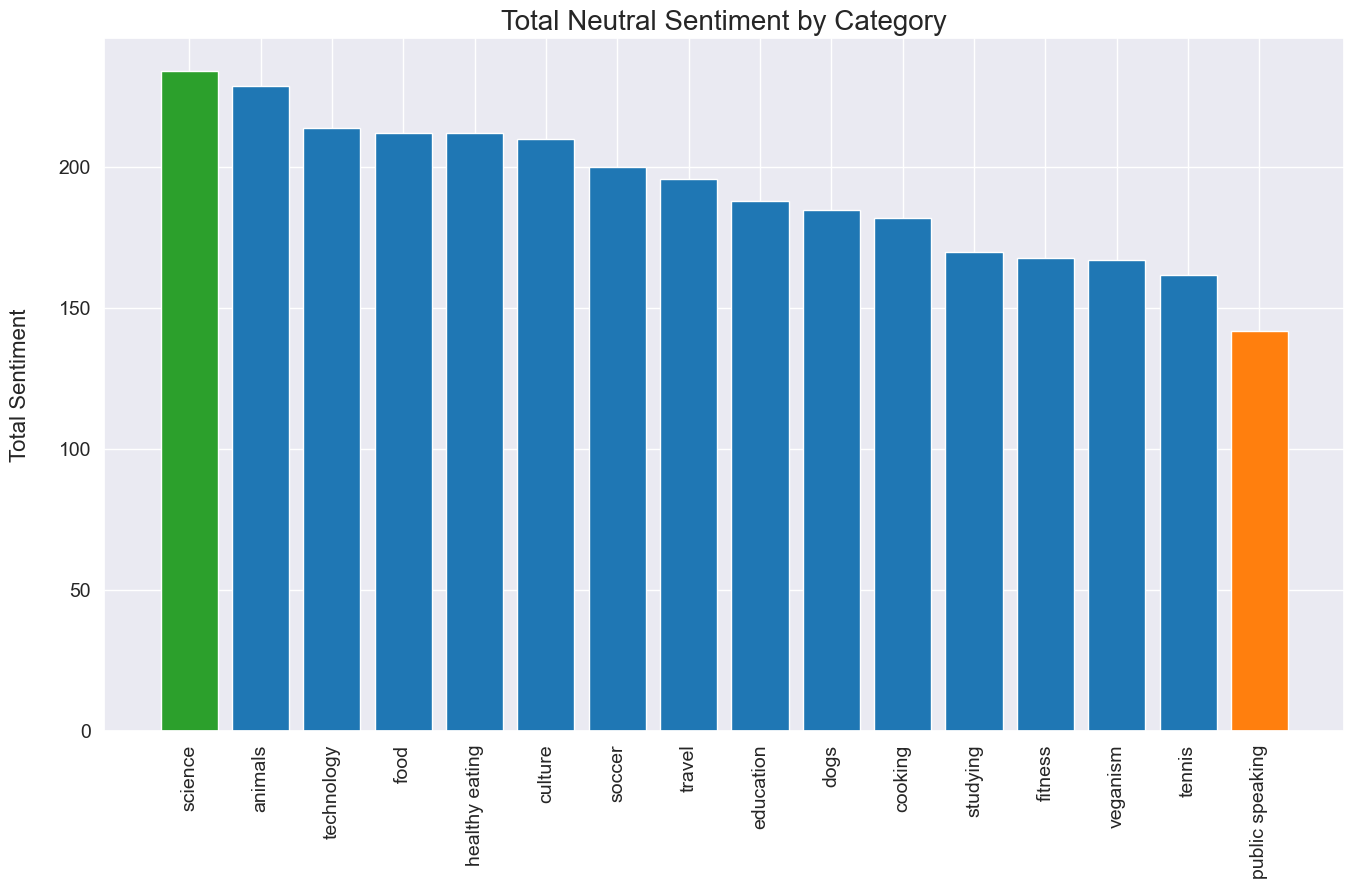

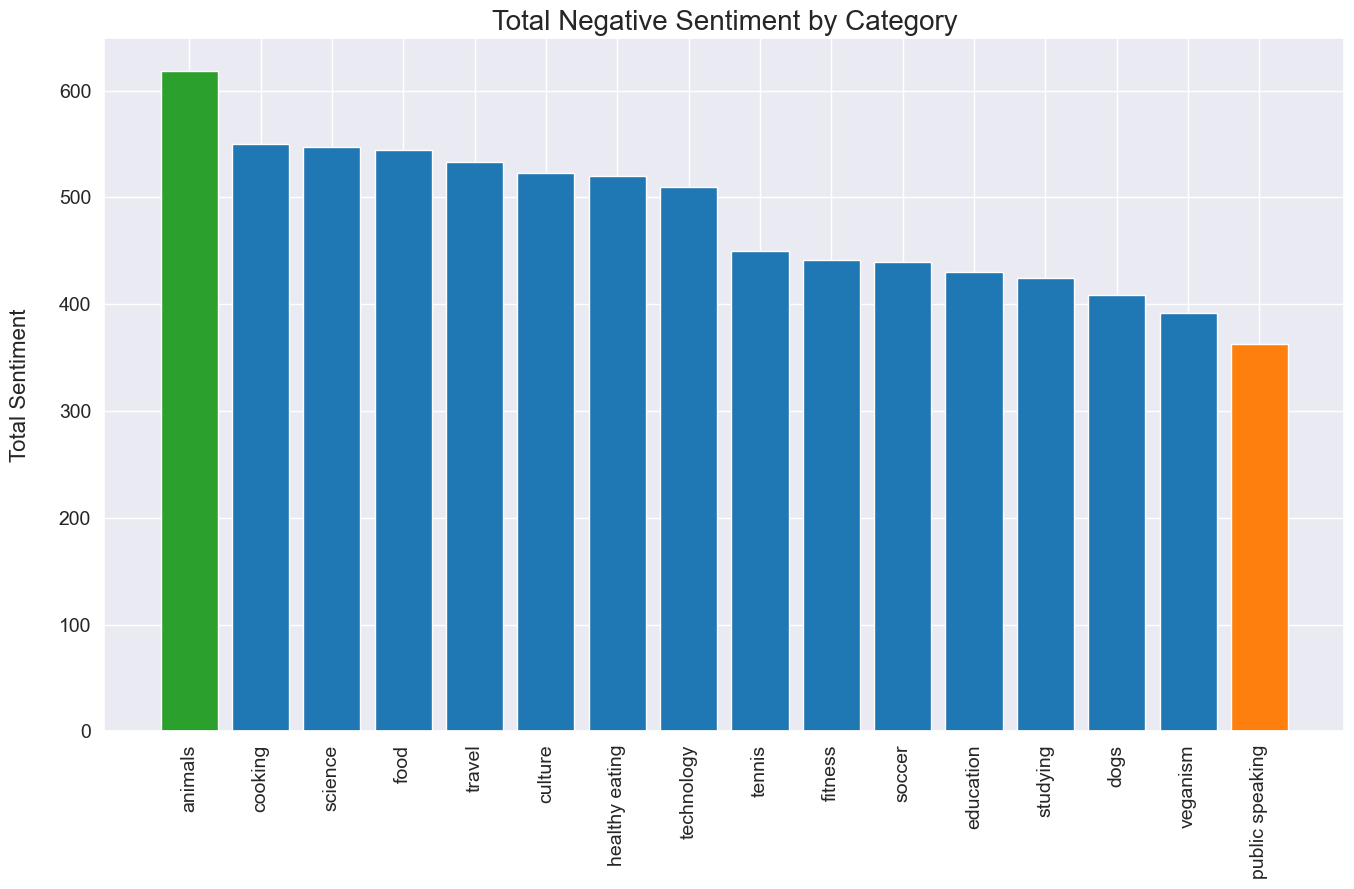

In [14]:
plot_sentiment_scores(categories, 'positive')
plot_sentiment_scores(categories, 'neutral')
plot_sentiment_scores(categories, 'negative')

In [15]:
total_sentiment = (df.groupby('Category')['Sentiment']
                   .value_counts()
                   .unstack()
                   .assign(Total=lambda x: x.sum(axis=1))
                   .sort_values(by='Total', ascending=False)
                   .drop(columns='Total'))
total_sentiment

Sentiment,negative,neutral,positive
Category,,,
animals,618,229,1050
science,547,234,1015
healthy eating,520,212,985
food,544,212,943
technology,510,214,974
culture,523,210,943
cooking,550,182,932
travel,533,196,918
soccer,440,200,817


In [16]:
# total_sentiment.plot(kind='bar', stacked=True, figsize=(16, 9))

# plt.title('Total Sentiment by Category', fontsize=20)
# plt.xlabel('')
# plt.ylabel('Total Sentiment\n', fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# plt.show()

In [17]:
def plot_total_sentiment(total_sentiment):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(16, 9))

    # Create stacked bar plot
    total_sentiment.plot(kind='bar', stacked=True, ax=ax)

    # Add labels, title, and grid
    ax.set_title('Total Sentiment by Category', fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('Total Sentiment\n', fontsize=16)
    ax.set_ylim(0, 2000)
    ax.tick_params(axis='x', labelsize=14, rotation=90)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True)

    plt.show()

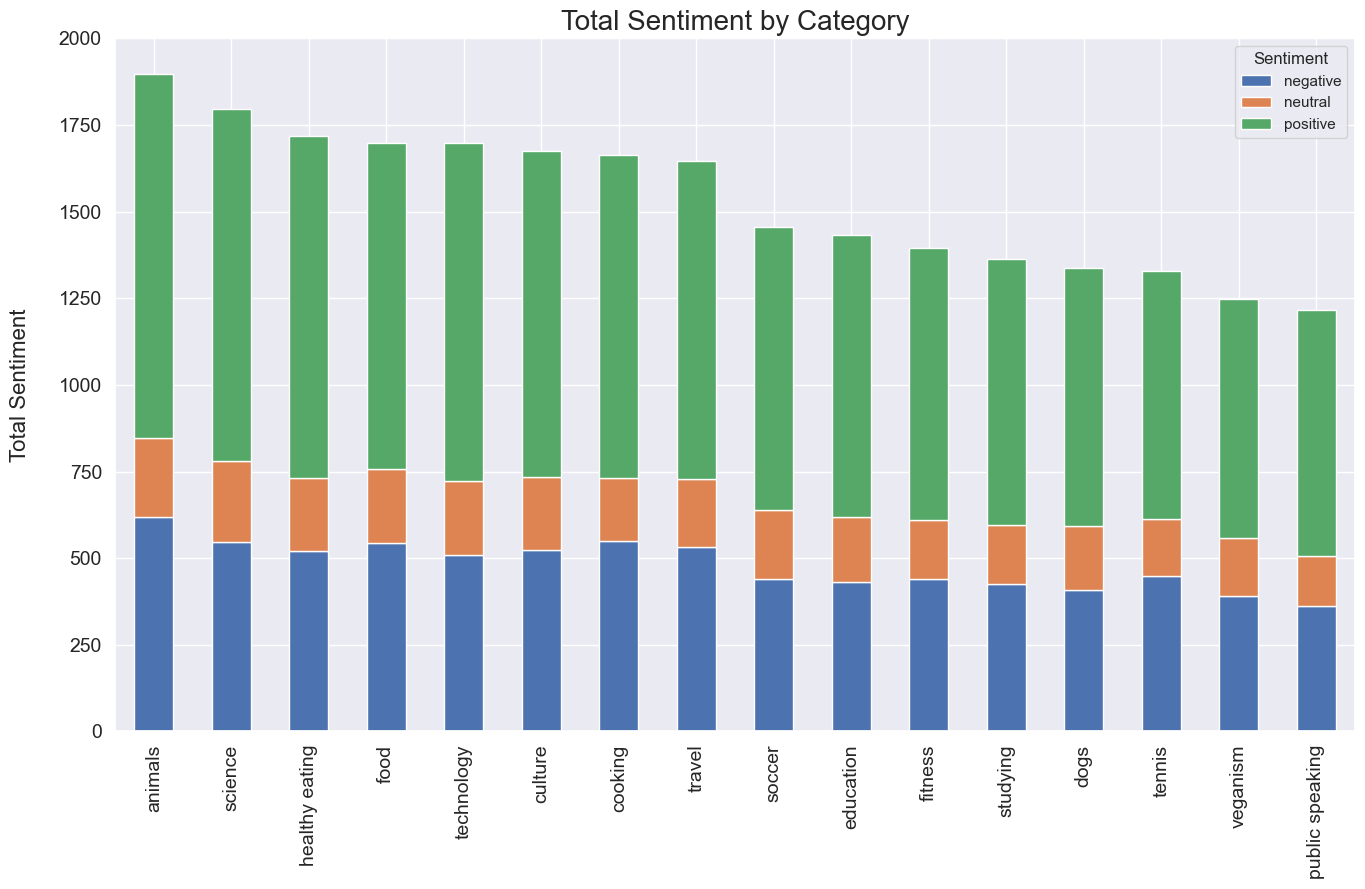

In [18]:
plot_total_sentiment(total_sentiment)

In [19]:
positive_sum = total_sentiment['positive'].sum()
neutral_sum = total_sentiment['neutral'].sum()
negative_sum = total_sentiment['negative'].sum()

sentiment_sum = pd.DataFrame({
    'Sentiment': ['negative', 'neutral', 'positive'],
    'Total Sentiment': [negative_sum, neutral_sum, positive_sum]})
sentiment_sum

,Sentiment,Total Sentiment
0,negative,7695
1,neutral,3071
2,positive,13807


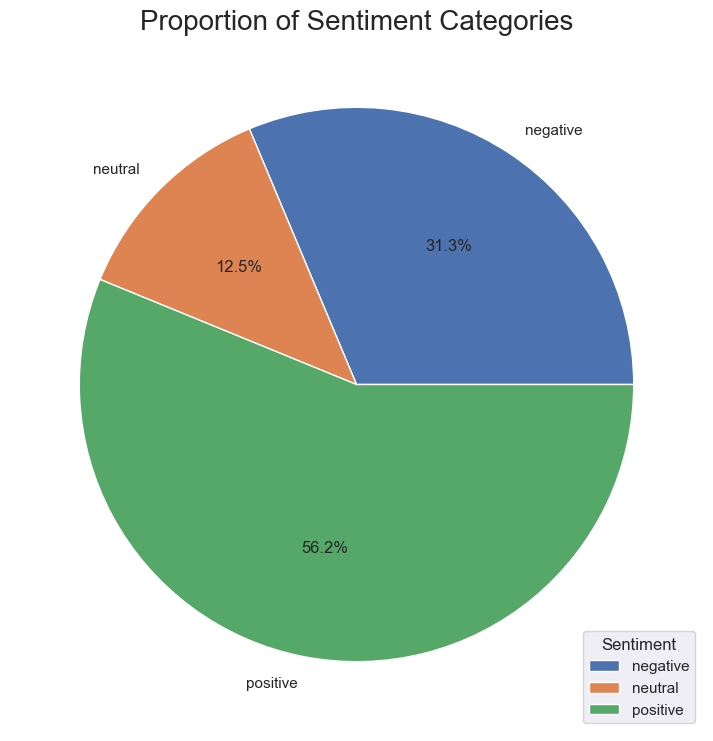

In [20]:
# Create pie chart
fig, ax = plt.subplots(figsize=(16, 9))
sentiment_sum.plot.pie(y='Total Sentiment', labels=sentiment_sum['Sentiment'], autopct='%1.1f%%', ax=ax)

ax.set_title('Proportion of Sentiment Categories', fontsize=20)
ax.set_ylabel('')
ax.legend(title='Sentiment', loc='lower right')

plt.show()

In [21]:
df['Content ID'][df['Category'] == 'animals'].count()

1897

In [22]:
df['Datetime'] = df['Datetime'].astype('datetime64[ns]')
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

In [23]:
df.groupby([
    'Sentiment',
    'Year',
    # 'Month'
    ])['Content ID'].count()

Sentiment  Year
negative   2020    4162
           2021    3533
neutral    2020    1671
           2021    1400
positive   2020    7447
           2021    6360
Name: Content ID, dtype: int64